In [1]:
!wget https://virtualmist.com/dataset/knn.tar.gz

--2019-12-23 15:05:01--  https://virtualmist.com/dataset/knn.tar.gz
Resolving virtualmist.com (virtualmist.com)... 104.18.55.115, 104.18.54.115, 2606:4700:30::6812:3773, ...
Connecting to virtualmist.com (virtualmist.com)|104.18.55.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73365723 (70M) [application/octet-stream]
Saving to: ‘knn.tar.gz’

knn.tar.gz          100%[===================>]  69.97M  26.1MB/s    in 2.7s    

2019-12-23 15:05:04 (26.1 MB/s) - ‘knn.tar.gz’ saved [73365723/73365723]



In [2]:
!tar xvzf knn.tar.gz

y_valid_bgsub.npy
y_valid.npy
y_train_bgsub.npy
y_train.npy
y_test_bgsub.npy
y_test.npy
X_valid_bgsub.npy
X_valid.npy
X_train_bgsub.npy
X_train.npy
X_test_bgsub.npy
X_test.npy


In [3]:
class_names=['boxing','boxing','handclapping','handwaving','jogging','running','walking']
class_names

['boxing',
 'boxing',
 'handclapping',
 'handwaving',
 'jogging',
 'running',
 'walking']

In [ ]:
# Imports
import numpy as np

#Loading Video DataSets
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')

X_valid = np.load('X_valid.npy')
y_valid = np.load('y_valid.npy')

X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')

X_train_bgsub = np.load('X_train_bgsub.npy')
y_train_bgsub = np.load('y_train_bgsub.npy')

X_valid_bgsub = np.load('X_valid_bgsub.npy')
y_valid_bgsub = np.load('y_valid_bgsub.npy')

X_test_bgsub = np.load('X_test_bgsub.npy')
y_test_bgsub = np.load('y_test_bgsub.npy')

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.GnBu):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.subplots(1, 1, figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
#cnf_matrix = confusion_matrix(y_test, y_pred)
#np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=class_names,
#                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                      title='Normalized confusion matrix')

#plt.show()


In [ ]:
#Labeling Class
from array import *
def label(test_label):
    x=[]
    for sample in test_label:
        for i in range(0,6):
            if sample[i]>0.5:
                x.append(i)
                break
    return np.array(x, dtype=np.uint8)

def frameFetch(vid_list,frame_no):
    z=[]
    x=0
    while(x<100):
        z.append(vid_list[x][frame_no])
        x+=1
    result = np.array(z,dtype=np.float64)
    return result.reshape(100,35,35)
        
                

In [7]:
# Imports
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D, LSTM
from keras.layers.core import Dense, Dropout

from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization

# Using the Sequential Model
model = Sequential()

# Adding Alternate convolutional and pooling layers

model.add(ConvLSTM2D(filters=16, kernel_size=(3, 3),strides=(1, 1),input_shape=X_train.shape[1:],padding='same',activation='sigmoid',return_sequences=True))
model.add(BatchNormalization())

model.add(Conv3D(filters=64, kernel_size=(10, 3, 3), strides=(3, 1, 1), padding='same', activation='relu'))
model.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

model.add(Conv3D(filters=128, kernel_size=(5, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
model.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

#model.add(Conv3D(filters=256, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
#model.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))


#model.add(LSTM(units = 10,activation='sigmoid',return_sequences = True))
model.add(Dropout(0.2))

model.add(GlobalAveragePooling3D())

model.add(Dense(32, activation='relu'))

model.add(Dense(6, activation='softmax'))

model.summary()

Using TensorFlow backend.






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_1 (ConvLSTM2D)  (None, 50, 35, 35, 16)    9856      
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 35, 35, 16)    64        
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 17, 35, 35, 64)    92224     
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 17, 18, 18, 64)    0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 17, 18, 18, 128)   368768    
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 17, 9, 9, 128)     0         
_

In [8]:
##### Imports
from keras.callbacks import ModelCheckpoint

# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

# Saving the model that performed the best on the validation set
checkpoint = ModelCheckpoint(filepath='modelBest.weights.best.hdf5', save_best_only=True, verbose=1)


history3_bg = model.fit(X_train_bgsub, y_train_bgsub, batch_size=15, epochs=60, 
                    validation_data=(X_valid_bgsub, y_valid_bgsub), verbose=1, callbacks=[checkpoint])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 722 samples, validate on 122 samples
Epoch 1/60





722/722 [==============================] - 35s 49ms/step - loss: 1.7234 - acc: 0.2424 - val_loss: 5.7367 - val_acc: 0.2541

Epoch 00001: val_loss improved from inf to 5.73667, saving model to modelBest.weights.best.hdf5
Epoch 2/60
722/722 [==============================] - 19s 27ms/step - loss: 1.3505 - acc: 0.3864 - val_loss: 3.6750 - val_acc: 0.1885

Epoch 00002: val_loss improved from 5.73667 to 3.67502, saving model to modelBest.weights.best.hdf5
Epoch 3/60
722/722 [==============================] - 19s 27ms/step - loss: 1.0750 - acc: 0.5291 - val_loss: 3.1073 - val_acc: 0.3607

Epoch 00003: val_loss improved from 3.67502 to 3.10725, saving model to modelBest.weights.best.hdf5
Epoch 4/60
722/722 [==============================] - 19s 27ms/step - loss: 0.9382 - acc: 0.5734 - val_loss: 11.1930 - val_acc: 0.2541

Epoch 00004: 

In [10]:
model.load_weights('modelBest.weights.best.hdf5')

# Testing the model on the Test data
(loss1_bg, accuracy1_bg) = model.evaluate(X_test_bgsub, y_test_bgsub, batch_size=15, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy1_bg * 100))

Accuracy on test data: 92.00%


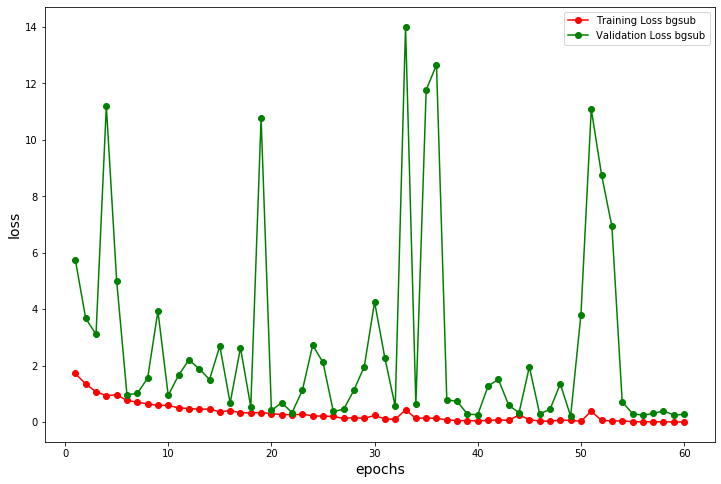

In [12]:
plt.figure(figsize=(12, 8))

loss1_bg = history3_bg.history['loss']                          # Loss on the training data
val_loss1_bg = history3_bg.history['val_loss']                  # Loss on the validation data
epochs = range(1,61)

plt.plot(epochs, loss1_bg, 'ro-', label='Training Loss bgsub')
plt.plot(epochs, val_loss1_bg, 'go-', label = 'Validation Loss bgsub')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

Normalized confusion matrix


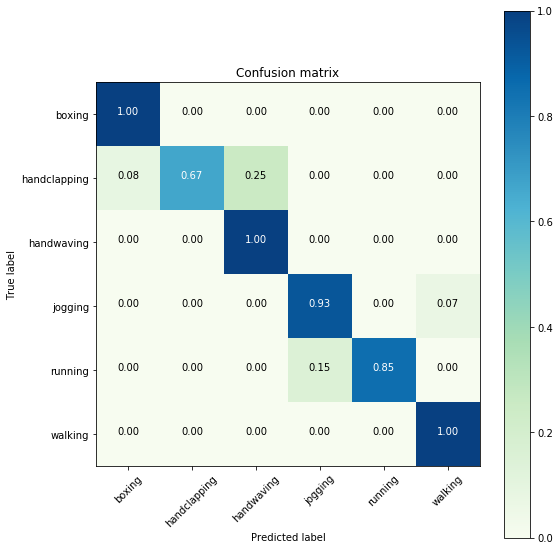

In [14]:
from keras.utils import to_categorical
y_predictions = model.predict_classes(X_test_bgsub);
y_pred=to_categorical(y_predictions, num_classes=6).argmax(axis=1);
y_test_cm = y_test_bgsub.argmax(axis=1);
#print y_predictions[:10]
#print y_test[:10]
model_cnf_matrix = confusion_matrix(y_test_cm,y_pred);
confusion_matrix_plot = plot_confusion_matrix(model_cnf_matrix, 
                                              classes=['boxing', 'handclapping', 'handwaving', 'jogging', 'running', 'walking'], 
                                              normalize=True)


In [ ]:
prediction = model.predict(X_test_bgsub)

In [ ]:
#Labeling Class
from array import *
def label(test_label):
    x=[]
    for sample in test_label:
        for i in range(0,6):
            if sample[i]>0.5:
                x.append(i)
                break
    return np.array(x, dtype=np.uint8)

def frameFetch(vid_list,frame_no):
    z=[]
    x=0
    while(x<100):
        z.append(vid_list[x][frame_no])
        x+=1
    result = np.array(z,dtype=np.float64)
    return result.reshape(100,35,35)
        
                

In [ ]:
test_labels=label(y_test_bgsub)
test_images=frameFetch(X_test,10)

In [22]:
test_images.shape

(100, 35, 35)

In [ ]:
#5 label Prediction
class_names=['boxing', 'handclapping', 'handwaving', 'jogging', 'running', 'walking']

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(6))
  plt.yticks([])
  thisplot = plt.bar(range(6), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


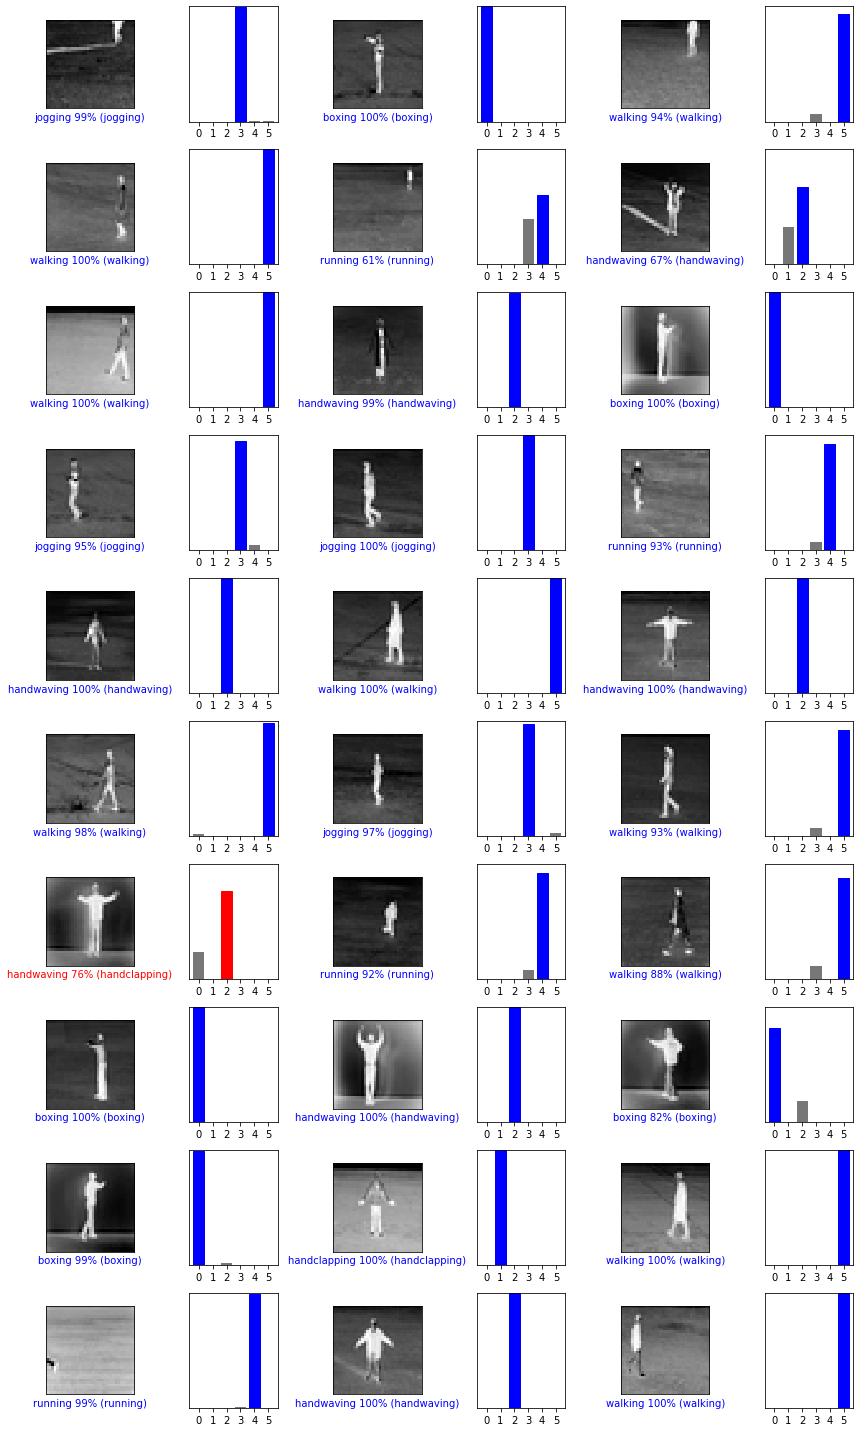

In [24]:
# Plot the first X test videos, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediction[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediction[i], test_labels)
plt.tight_layout()
plt.show()
